In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Accessing the dataset

itc = pd.read_csv('/content/ITC.csv')
itc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-23,251.449997,253.699997,248.500000,252.000000,242.401566,40491633
1,2022-03-24,251.949997,256.500000,251.449997,254.850006,245.143005,38239419
2,2022-03-25,255.300003,255.750000,249.250000,253.350006,243.700150,29284643
3,2022-03-28,254.000000,258.000000,252.550003,257.049988,247.259201,24916402
4,2022-03-29,257.049988,257.500000,253.750000,254.600006,244.902542,18122714
...,...,...,...,...,...,...,...
246,2023-03-17,385.000000,385.000000,369.649994,375.549988,375.549988,48904254
247,2023-03-20,373.299988,379.350006,372.000000,378.799988,378.799988,10122167
248,2023-03-21,378.799988,378.799988,374.049988,376.950012,376.950012,11610832
249,2023-03-22,376.950012,378.850006,374.200012,377.750000,377.750000,4774867


In [3]:
# Description about the dataset

itc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
itc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,317.887650,321.008168,314.846613,318.101593,312.767921,1.479772e+07
std,40.561144,40.530849,40.027238,40.334148,42.159677,9.504515e+06
min,249.600006,253.699997,248.500000,249.199997,239.708206,3.170564e+06
25%,273.350006,275.000000,270.350006,273.699997,268.859879,8.860477e+06
50%,330.000000,333.000000,327.549988,330.100006,324.974884,1.181910e+07
75%,343.400009,346.050003,339.799988,343.450012,338.117630,1.781370e+07
max,392.100006,394.000000,385.649994,392.399994,392.399994,7.828771e+07


In [6]:
# Checking for null values

itc.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Using Adjusted Close

itc_data = itc['Adj Close']
itc_data

0      242.401566
1      245.143005
2      243.700150
3      247.259201
4      244.902542
          ...    
246    375.549988
247    378.799988
248    376.950012
249    377.750000
250    380.649994
Name: Adj Close, Length: 251, dtype: float64

In [8]:
itc_data.shape

(251,)

In [10]:
# Splitting the dataset into train and test

itc_train = itc_data[0:200]
itc_test = itc_data[200:]

In [11]:
# Checking the shape of train and test data

itc_train.shape, itc_test.shape

((200,), (51,))

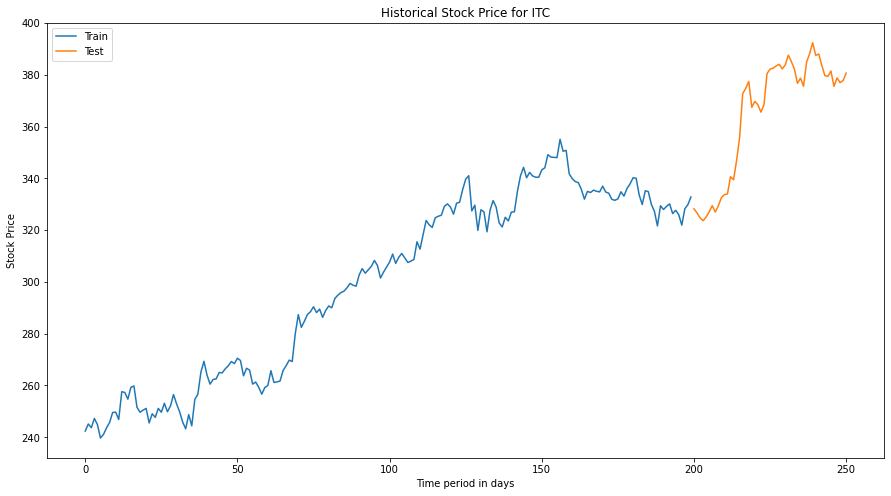

In [19]:
# Visualization of the train and test dataset

plt.figure(figsize = (15, 8))
plt.plot(itc_train)
plt.plot(itc_test)
plt.xlabel("Time period in days")
plt.ylabel("Stock Price")
plt.title("Historical Stock Price for ITC")
plt.legend(['Train', 'Test'])
plt.show();

In [29]:
# Standardizing the data using MinMax scaler

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [31]:
train_scaled = mms.fit_transform(np.array(itc_train).reshape(-1,1))

In [32]:
test_scaled = mms.fit_transform(np.array(itc_test).reshape(-1, 1))

In [33]:
# Converting the Time Series problem into a Regression problem for train data, considering the window size to be 10

X_train = []
y_train = []

for i in range(10, 200):
  X_train.append(train_scaled[i-10:i, 0])
  y_train.append(train_scaled[i])

In [34]:
X_train

[array([0.02334104, 0.04709875, 0.03459476, 0.065438  , 0.04501486,
        0.        , 0.01208733, 0.03417782, 0.0521004 , 0.08544474]),
 array([0.04709875, 0.03459476, 0.065438  , 0.04501486, 0.        ,
        0.01208733, 0.03417782, 0.0521004 , 0.08544474, 0.08669515]),
 array([0.03459476, 0.065438  , 0.04501486, 0.        , 0.01208733,
        0.03417782, 0.0521004 , 0.08544474, 0.08669515, 0.0621037 ]),
 array([0.065438  , 0.04501486, 0.        , 0.01208733, 0.03417782,
        0.0521004 , 0.08544474, 0.08669515, 0.0621037 , 0.15505052]),
 array([0.04501486, 0.        , 0.01208733, 0.03417782, 0.0521004 ,
        0.08544474, 0.08669515, 0.0621037 , 0.15505052, 0.15254969]),
 array([0.        , 0.01208733, 0.03417782, 0.0521004 , 0.08544474,
        0.08669515, 0.0621037 , 0.15505052, 0.15254969, 0.1300424 ]),
 array([0.01208733, 0.03417782, 0.0521004 , 0.08544474, 0.08669515,
        0.0621037 , 0.15505052, 0.15254969, 0.1300424 , 0.16963867]),
 array([0.03417782, 0.0521004 , 0.

In [35]:
y_train

[array([0.08669515]),
 array([0.0621037]),
 array([0.15505052]),
 array([0.15254969]),
 array([0.1300424]),
 array([0.16963867]),
 array([0.17422378]),
 array([0.10295025]),
 array([0.08627821]),
 array([0.09336389]),
 array([0.09919928]),
 array([0.05043331]),
 array([0.0812767]),
 array([0.06918938]),
 array([0.09919928]),
 array([0.08627821]),
 array([0.11628799]),
 array([0.08794543]),
 array([0.10711817]),
 array([0.14546429]),
 array([0.11462077]),
 array([0.08794543]),
 array([0.05376762]),
 array([0.03084338]),
 array([0.07835907]),
 array([0.04084682]),
 array([0.12920906]),
 array([0.14671443]),
 array([0.22048879]),
 array([0.25675076]),
 array([0.21090229]),
 array([0.18047585]),
 array([0.1958976]),
 array([0.19803029]),
 array([0.21935923]),
 array([0.21807947]),
 array([0.23173007]),
 array([0.24196795]),
 array([0.25604515]),
 array([0.24921998]),
 array([0.26713595]),
 array([0.2594576]),
 array([0.20826817]),
 array([0.23343643]),
 array([0.22746418]),
 array([0.18054

In [39]:
# Converting the datastructure for the train data

X_train = np.array(X_train)
y_train = np.array(y_train)

In [40]:
# Checking the shape of the train and test data

X_train.shape, y_train.shape

((190, 10), (190, 1))

In [42]:
# Converting the Time Series problem into a Regression problem for train data, considering the window size to be 10

X_test = []
y_test = []

for i in range(10, 50):
  X_test.append(test_scaled[i-10:i, 0])
  y_test.append(test_scaled[i])

In [43]:
# Converting the datastructure for the train data

X_test = np.array(X_test)
y_test = np.array(y_test)

In [44]:
# Checking the shape of the train and test data

X_test.shape, y_test.shape

((40, 10), (40, 1))

Epoch 1/100
6/6 [==============================] - 3s 10ms/step - loss: 0.2298 - mae: 0.4161
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1211 - mae: 0.2780
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0760 - mae: 0.2017
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0732 - mae: 0.2116
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0643 - mae: 0.1950
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0559 - mae: 0.1705
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0523 - mae: 0.1589
Epoch 8/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0488 - mae: 0.1519
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0451 - mae: 0.1466
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0416 - mae: 0.1413
Epoch 11/100
6/6 [==============================] - 0s 14ms/step - loss

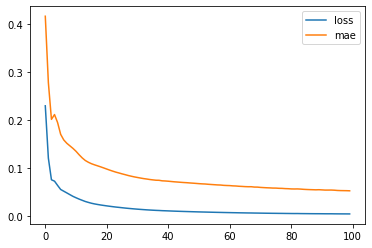

In [41]:
# Building the basic model

lstm_1 = tf.keras.Sequential()
lstm_1.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))
lstm_1.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_1.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_1 = lstm_1.fit(X_train, y_train, epochs = 100)
pd.DataFrame(hist_1.history).plot();

In [45]:
# Evaluating the model

lstm_test_1 = lstm_1.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_1)

2/2 [==============================] - 1s 11ms/step - loss: 0.0373 - mae: 0.1422
The test Loss: [0.037262916564941406, 0.14215965569019318]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

Epoch 1/100
6/6 [==============================] - 3s 10ms/step - loss: 0.1127 - mae: 0.2636
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0385 - mae: 0.1526
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0230 - mae: 0.1210
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0159 - mae: 0.0966
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0108 - mae: 0.0764
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0092 - mae: 0.0709
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0080 - mae: 0.0675
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0071 - mae: 0.0626
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0068 - mae: 0.0625
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0062 - mae: 0.0591
Epoch 11/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0058

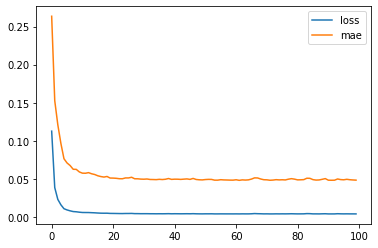

In [46]:
# Building the model with a different learning rate

lstm_2 = tf.keras.Sequential()
lstm_2.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))
lstm_2.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_2.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_2 = lstm_2.fit(X_train, y_train, epochs = 100)
pd.DataFrame(hist_2.history).plot();

In [47]:
# Evaluating the model

lstm_test_2 = lstm_2.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_2)

2/2 [==============================] - 1s 9ms/step - loss: 0.0383 - mae: 0.1406
The test Loss: [0.03831424564123154, 0.1406257003545761]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

Epoch 1/100
5/5 [==============================] - 4s 229ms/step - loss: 0.3155 - mae: 0.4789 - val_loss: 0.5401 - val_mae: 0.7335
Epoch 2/100
5/5 [==============================] - 0s 36ms/step - loss: 0.2283 - mae: 0.3965 - val_loss: 0.3623 - val_mae: 0.5940
Epoch 3/100
5/5 [==============================] - 0s 29ms/step - loss: 0.1507 - mae: 0.3110 - val_loss: 0.2251 - val_mae: 0.4433
Epoch 4/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0968 - mae: 0.2331 - val_loss: 0.1435 - val_mae: 0.2983
Epoch 5/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0723 - mae: 0.1979 - val_loss: 0.1350 - val_mae: 0.3087
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0731 - mae: 0.2121 - val_loss: 0.1312 - val_mae: 0.3071
Epoch 7/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0671 - mae: 0.2015 - val_loss: 0.1103 - val_mae: 0.2676
Epoch 8/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0589 - mae: 0.1

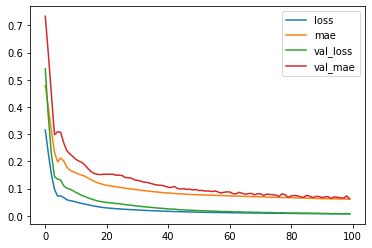

In [50]:
# Building the model with validation split

lstm_3 = tf.keras.Sequential()
lstm_3.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))
lstm_3.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_3.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_3 = lstm_3.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_3.history).plot();

In [51]:
# Evaluating the model

lstm_test_3 = lstm_3.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_3)

2/2 [==============================] - 0s 8ms/step - loss: 0.0413 - mae: 0.1517
The test Loss: [0.0413057878613472, 0.15173324942588806]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

Model 2 is the best model till now

Epoch 1/100
5/5 [==============================] - 4s 224ms/step - loss: 0.1412 - mae: 0.2961 - val_loss: 0.0837 - val_mae: 0.2304
Epoch 2/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0435 - mae: 0.1569 - val_loss: 0.0662 - val_mae: 0.2288
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0283 - mae: 0.1267 - val_loss: 0.0270 - val_mae: 0.1240
Epoch 4/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0208 - mae: 0.1103 - val_loss: 0.0184 - val_mae: 0.0948
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0154 - mae: 0.0943 - val_loss: 0.0141 - val_mae: 0.0812
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0125 - mae: 0.0815 - val_loss: 0.0172 - val_mae: 0.1066
Epoch 7/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0110 - mae: 0.0781 - val_loss: 0.0098 - val_mae: 0.0663
Epoch 8/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0100 - mae: 0.0

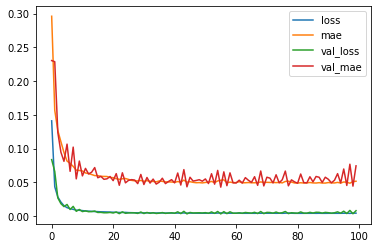

In [52]:
# # Building the model with validation split and learning rate = 0.01

lstm_4 = tf.keras.Sequential()
lstm_4.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))
lstm_4.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_4.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_4 = lstm_4.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_4.history).plot();

In [53]:
# Evaluating the model

lstm_test_4 = lstm_4.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_4)

2/2 [==============================] - 0s 9ms/step - loss: 0.0373 - mae: 0.1410
The test Loss: [0.03728552535176277, 0.141044020652771]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

**Model 4 (Validation Split and learning rate = 0.01):** Training Loss: 0.0043, Test Loss: 0.0373, MAE: 0.1410 [Overfitting, model improved]

Model 4 is the best model till now

Epoch 1/100
5/5 [==============================] - 4s 166ms/step - loss: 0.1290 - mae: 0.2839 - val_loss: 0.0711 - val_mae: 0.2006
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0434 - mae: 0.1573 - val_loss: 0.0611 - val_mae: 0.2185
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0275 - mae: 0.1260 - val_loss: 0.0250 - val_mae: 0.1179
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0209 - mae: 0.1126 - val_loss: 0.0156 - val_mae: 0.0791
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0149 - mae: 0.0921 - val_loss: 0.0129 - val_mae: 0.0789
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0117 - mae: 0.0794 - val_loss: 0.0194 - val_mae: 0.1209
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0103 - mae: 0.0737 - val_loss: 0.0093 - val_mae: 0.0677
Epoch 8/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0095 - mae: 0.0

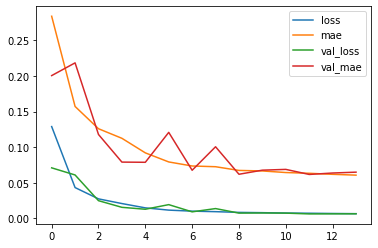

In [54]:
# Building the model with Early Stopping and learning rate = 0.01

lstm_5 = tf.keras.Sequential()
lstm_5.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))
lstm_5.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_5.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model

tf.random.set_seed(100)
hist_5 = lstm_5.fit(X_train, y_train, epochs = 100, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_5.history).plot();

In [55]:
# Evaluating the model

lstm_test_5 = lstm_5.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_5)

2/2 [==============================] - 0s 12ms/step - loss: 0.0410 - mae: 0.1525
The test Loss: [0.040971893817186356, 0.15249037742614746]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

**Model 4 (Validation Split and learning rate = 0.01):** Training Loss: 0.0043, Test Loss: 0.0373, MAE: 0.1410 [Overfitting, model improved]

**Model 5 (Early Stop and learning rate = 0.01):** Training Loss: 0.0067, Test Loss: 0.0410, MAE: 0.1525 [Overfitting, model did not improve]

Model 4 is the best model till now

Epoch 1/100
5/5 [==============================] - 5s 168ms/step - loss: 0.1428 - mae: 0.2983 - val_loss: 0.0725 - val_mae: 0.2154
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0410 - mae: 0.1554 - val_loss: 0.0671 - val_mae: 0.2360
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0294 - mae: 0.1328 - val_loss: 0.0218 - val_mae: 0.1008
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0218 - mae: 0.1162 - val_loss: 0.0145 - val_mae: 0.0750
Epoch 5/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0153 - mae: 0.0931 - val_loss: 0.0140 - val_mae: 0.0871
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0127 - mae: 0.0843 - val_loss: 0.0167 - val_mae: 0.1089
Epoch 7/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0109 - mae: 0.0773 - val_loss: 0.0091 - val_mae: 0.0670
Epoch 8/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0102 - mae: 0.0

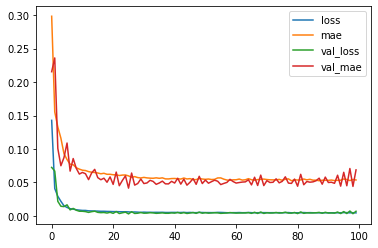

In [56]:
# Building model with dropout

lstm_6 = tf.keras.Sequential()
lstm_6.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))

# Drop out layer
lstm_6.add(tf.keras.layers.Dropout(0.1))

lstm_6.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_6.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_6 = lstm_6.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_6.history).plot();

In [57]:
# Evaluating the model

lstm_test_6 = lstm_6.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_6)

2/2 [==============================] - 0s 10ms/step - loss: 0.0375 - mae: 0.1410
The test Loss: [0.037463728338479996, 0.1410350203514099]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

**Model 4 (Validation Split and learning rate = 0.01):** Training Loss: 0.0043, Test Loss: 0.0373, MAE: 0.1410 [Overfitting, model improved]

**Model 5 (Early Stop and learning rate = 0.01):** Training Loss: 0.0067, Test Loss: 0.0410, MAE: 0.1525 [Overfitting, model did not improve]

**Model 6 (Dropout and learning rate = 0.01):** Training Loss: 0.0046, Test Loss: 0.0375, MAE: 0.1410 [Overfitting, same result as model 4]

Model 6 is the best model till now

Epoch 1/100
5/5 [==============================] - 4s 184ms/step - loss: 1.0898 - mae: 0.7461 - val_loss: 0.2235 - val_mae: 0.4698
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 0.2573 - mae: 0.3655 - val_loss: 0.0168 - val_mae: 0.1218
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1979 - mae: 0.3194 - val_loss: 0.0672 - val_mae: 0.2565
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1008 - mae: 0.2361 - val_loss: 0.1519 - val_mae: 0.3877
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0662 - mae: 0.1908 - val_loss: 0.1541 - val_mae: 0.3908
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0737 - mae: 0.2082 - val_loss: 0.1288 - val_mae: 0.3570
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0514 - mae: 0.1673 - val_loss: 0.0962 - val_mae: 0.3078
Epoch 8/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0522 - mae: 0.1

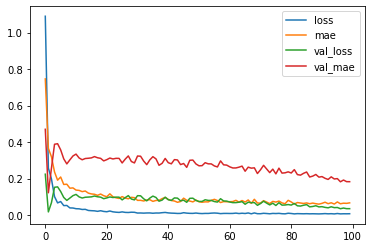

In [58]:
# Building the model with Batch Normalization

lstm_7 = tf.keras.Sequential()
lstm_7.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))

# Batch Normalization
lstm_7.add(tf.keras.layers.BatchNormalization())

# Drop out layer
lstm_7.add(tf.keras.layers.Dropout(0.1))

lstm_7.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_7.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_7 = lstm_7.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_7.history).plot();

In [59]:
# Evaluating the model

lstm_test_7 = lstm_7.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_7)

2/2 [==============================] - 0s 7ms/step - loss: 0.0539 - mae: 0.2131
The test Loss: [0.0538824088871479, 0.2131328284740448]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

**Model 4 (Validation Split and learning rate = 0.01):** Training Loss: 0.0043, Test Loss: 0.0373, MAE: 0.1410 [Overfitting, model improved]

**Model 5 (Early Stop and learning rate = 0.01):** Training Loss: 0.0067, Test Loss: 0.0410, MAE: 0.1525 [Overfitting, model did not improve]

**Model 6 (Dropout and learning rate = 0.01):** Training Loss: 0.0046, Test Loss: 0.0375, MAE: 0.1410 [Overfitting, same result as model 4]

**Model 7 (Batch Normalization and learning rate = 0.01):** Training Loss: 0.0069, Test Loss: 0.0539, MAE:  [Overfitting, model did not improve]

Model 6 is the best model till now

Epoch 1/100
5/5 [==============================] - 5s 242ms/step - loss: 0.1200 - mae: 0.2734 - val_loss: 0.1148 - val_mae: 0.2765
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0543 - mae: 0.1729 - val_loss: 0.0551 - val_mae: 0.1770
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0309 - mae: 0.1290 - val_loss: 0.0331 - val_mae: 0.1215
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0225 - mae: 0.1097 - val_loss: 0.0238 - val_mae: 0.1077
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0176 - mae: 0.0991 - val_loss: 0.0188 - val_mae: 0.1018
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0145 - mae: 0.0892 - val_loss: 0.0128 - val_mae: 0.0708
Epoch 7/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0127 - mae: 0.0826 - val_loss: 0.0137 - val_mae: 0.0898
Epoch 8/100
5/5 [==============================] - 0s 33ms/step - loss: 0.0110 - mae: 0.0

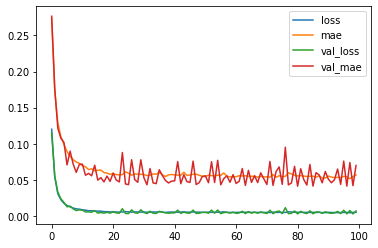

In [60]:
# Building the model with 2 hidden layers

lstm_8 = tf.keras.Sequential()
lstm_8.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))
lstm_8.add(tf.keras.layers.LSTM(20, return_sequences = True, input_shape = (10, 1)))

# Drop out layer
lstm_8.add(tf.keras.layers.Dropout(0.1))

lstm_8.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_8.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_8 = lstm_8.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_8.history).plot();

In [61]:
# Evaluating the model

lstm_test_8 = lstm_8.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_8)

2/2 [==============================] - 0s 10ms/step - loss: 0.0351 - mae: 0.1345
The test Loss: [0.03508559614419937, 0.13447624444961548]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

**Model 4 (Validation Split and learning rate = 0.01):** Training Loss: 0.0043, Test Loss: 0.0373, MAE: 0.1410 [Overfitting, model improved]

**Model 5 (Early Stop and learning rate = 0.01):** Training Loss: 0.0067, Test Loss: 0.0410, MAE: 0.1525 [Overfitting, model did not improve]

**Model 6 (Dropout and learning rate = 0.01):** Training Loss: 0.0046, Test Loss: 0.0375, MAE: 0.1410 [Overfitting, same result as model 4]

**Model 7 (Batch Normalization and learning rate = 0.01):** Training Loss: 0.0069, Test Loss: 0.0539, MAE:  [Overfitting, model did not improve]

**Model 8 (2 Hidden layers and learning rate = 0.01):** Training Loss: 0.0052, Test Loss: 0.0351, MAE: 0.1345 [Overfitting, model improved]

Model 8 is the best model till now

Epoch 1/100
5/5 [==============================] - 6s 237ms/step - loss: 0.1289 - mae: 0.2864 - val_loss: 0.0928 - val_mae: 0.2184
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0596 - mae: 0.1865 - val_loss: 0.0617 - val_mae: 0.1870
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0358 - mae: 0.1454 - val_loss: 0.0319 - val_mae: 0.1090
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0233 - mae: 0.1123 - val_loss: 0.0318 - val_mae: 0.1483
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0189 - mae: 0.1013 - val_loss: 0.0159 - val_mae: 0.0810
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0156 - mae: 0.0930 - val_loss: 0.0128 - val_mae: 0.0763
Epoch 7/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0135 - mae: 0.0874 - val_loss: 0.0108 - val_mae: 0.0740
Epoch 8/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0122 - mae: 0.0

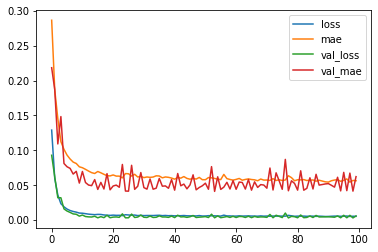

In [62]:
# Building the model with 10 units in the 2nd hidden layer

lstm_9 = tf.keras.Sequential()
lstm_9.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (10, 1)))
lstm_9.add(tf.keras.layers.LSTM(10, return_sequences = True, input_shape = (10, 1)))

# Drop out layer
lstm_9.add(tf.keras.layers.Dropout(0.1))

lstm_9.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_9.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_9 = lstm_9.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_9.history).plot();

In [63]:
# Evaluating the model

lstm_test_9 = lstm_9.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_9)

2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - mae: 0.1347
The test Loss: [0.03509942814707756, 0.13473083078861237]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

**Model 4 (Validation Split and learning rate = 0.01):** Training Loss: 0.0043, Test Loss: 0.0373, MAE: 0.1410 [Overfitting, model improved]

**Model 5 (Early Stop and learning rate = 0.01):** Training Loss: 0.0067, Test Loss: 0.0410, MAE: 0.1525 [Overfitting, model did not improve]

**Model 6 (Dropout and learning rate = 0.01):** Training Loss: 0.0046, Test Loss: 0.0375, MAE: 0.1410 [Overfitting, same result as model 4]

**Model 7 (Batch Normalization and learning rate = 0.01):** Training Loss: 0.0069, Test Loss: 0.0539, MAE:  [Overfitting, model did not improve]

**Model 8 (2 Hidden layers and learning rate = 0.01):** Training Loss: 0.0052, Test Loss: 0.0351, MAE: 0.1345 [Overfitting, model improved]

**Model 9 (2 Hidden layers, reduced no of units and learning rate = 0.01):** Training Loss: 0.0052 , Test Loss: 0.0351, MAE: 0.1345 [Overfitting, same as Model 8]

Model 8 is the best model till now

Epoch 1/100
5/5 [==============================] - 5s 363ms/step - loss: 0.1500 - mae: 0.3119 - val_loss: 0.1226 - val_mae: 0.2981
Epoch 2/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0772 - mae: 0.2193 - val_loss: 0.1337 - val_mae: 0.3372
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0628 - mae: 0.1921 - val_loss: 0.0702 - val_mae: 0.2072
Epoch 4/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0421 - mae: 0.1606 - val_loss: 0.0438 - val_mae: 0.1567
Epoch 5/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0299 - mae: 0.1272 - val_loss: 0.0335 - val_mae: 0.1184
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0254 - mae: 0.1197 - val_loss: 0.0299 - val_mae: 0.1383
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0208 - mae: 0.1063 - val_loss: 0.0220 - val_mae: 0.1016
Epoch 8/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0187 - mae: 0.1

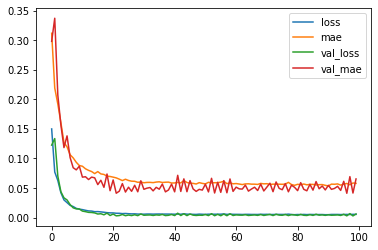

In [64]:
# Building the model with 30 units in the 1st hidden layer and 10 units in the 2nd hidden layer

lstm_10 = tf.keras.Sequential()
lstm_10.add(tf.keras.layers.LSTM(30, return_sequences = True, input_shape = (10, 1)))
lstm_10.add(tf.keras.layers.LSTM(10, return_sequences = True, input_shape = (10, 1)))

# Drop out layer
lstm_10.add(tf.keras.layers.Dropout(0.1))

lstm_10.add(tf.keras.layers.Dense(1))

# Compiling the basic model

lstm_10.compile (loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# Training the model

tf.random.set_seed(100)
hist_10 = lstm_10.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
pd.DataFrame(hist_10.history).plot();

In [65]:
# Evaluating the model

lstm_test_10 = lstm_10.evaluate(X_test, y_test)
print ("The test Loss:", lstm_test_10)

2/2 [==============================] - 0s 8ms/step - loss: 0.0350 - mae: 0.1345
The test Loss: [0.035023391246795654, 0.1345154196023941]


###**Result**

**Model 1 (Basic model):** Training Loss: 0.0051, Test Loss: 0.0373, MAE: 0.1422 [Overfitting]

**Model 2 (Basic model with learning rate = 0.01):** Training Loss: 0.0040, Test Loss: 0.0383, MAE: 0.1406 [Overfitting, model did not improve]

**Model 3 (Validation Split):** Training Loss: 0.0073, Test Loss: 0.0413, MAE: 0.1517 [Overfitting, model did not improve]

**Model 4 (Validation Split and learning rate = 0.01):** Training Loss: 0.0043, Test Loss: 0.0373, MAE: 0.1410 [Overfitting, model improved]

**Model 5 (Early Stop and learning rate = 0.01):** Training Loss: 0.0067, Test Loss: 0.0410, MAE: 0.1525 [Overfitting, model did not improve]

**Model 6 (Dropout and learning rate = 0.01):** Training Loss: 0.0046, Test Loss: 0.0375, MAE: 0.1410 [Overfitting, same result as model 4]

**Model 7 (Batch Normalization and learning rate = 0.01):** Training Loss: 0.0069, Test Loss: 0.0539, MAE:  [Overfitting, model did not improve]

**Model 8 (2 Hidden layers and learning rate = 0.01):** Training Loss: 0.0052, Test Loss: 0.0351, MAE: 0.1345 [Overfitting, model improved]

**Model 9 (2 Hidden layers, reduced no of units and learning rate = 0.01):** Training Loss: 0.0052 , Test Loss: 0.0351, MAE: 0.1345 [Overfitting, same as Model 8]

**Model 10 (2 Hidden layers, reduced no of units in both hidden layers and learning rate = 0.01):** Training Loss: 0.0055 , Test Loss: 0.0350, MAE: 0.1345 [Overfitting, same as Model 8]

Model 8 is the best model till now

In [66]:
# Creating a DataFrame to show the results of the analysis

data = pd.DataFrame()
data['Model_Name'] = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6',
                      'Model 7', 'Model 8', 'Model 9', 'Model 10']
data

,Model_Name
0,Model 1
1,Model 2
2,Model 3
3,Model 4
4,Model 5
5,Model 6
6,Model 7
7,Model 8
8,Model 9
9,Model 10


In [67]:
data['Train Loss'] = [0.0051, 0.0040, 0.0073, 0.0043, 0.0067, 0.0046, 0.0069, 0.0052, 0.0052, 0.0055]
data['Test Loss'] = [0.0373, 0.0383, 0.0413, 0.0373, 0.0410, 0.0375, 0.0539, 0.0351, 0.0351, 0.0350]
data

,Model_Name,Train Loss,Test Loss
0,Model 1,0.0051,0.0373
1,Model 2,0.0040,0.0383
2,Model 3,0.0073,0.0413
3,Model 4,0.0043,0.0373
4,Model 5,0.0067,0.0410
5,Model 6,0.0046,0.0375
6,Model 7,0.0069,0.0539
7,Model 8,0.0052,0.0351
8,Model 9,0.0052,0.0351
9,Model 10,0.0055,0.0350


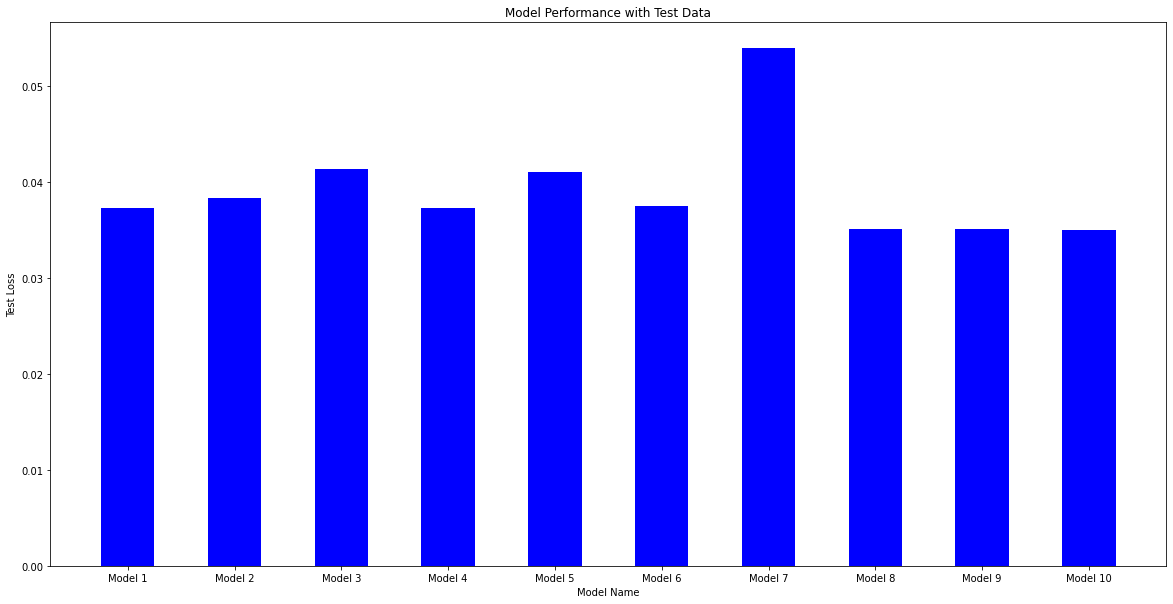

In [68]:
# Plotting the result

plt.figure(figsize = (20, 10))
plt.bar(data['Model_Name'], data['Test Loss'], color = 'blue', width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("Test Loss")
plt.title("Model Performance with Test Data")
plt.show();

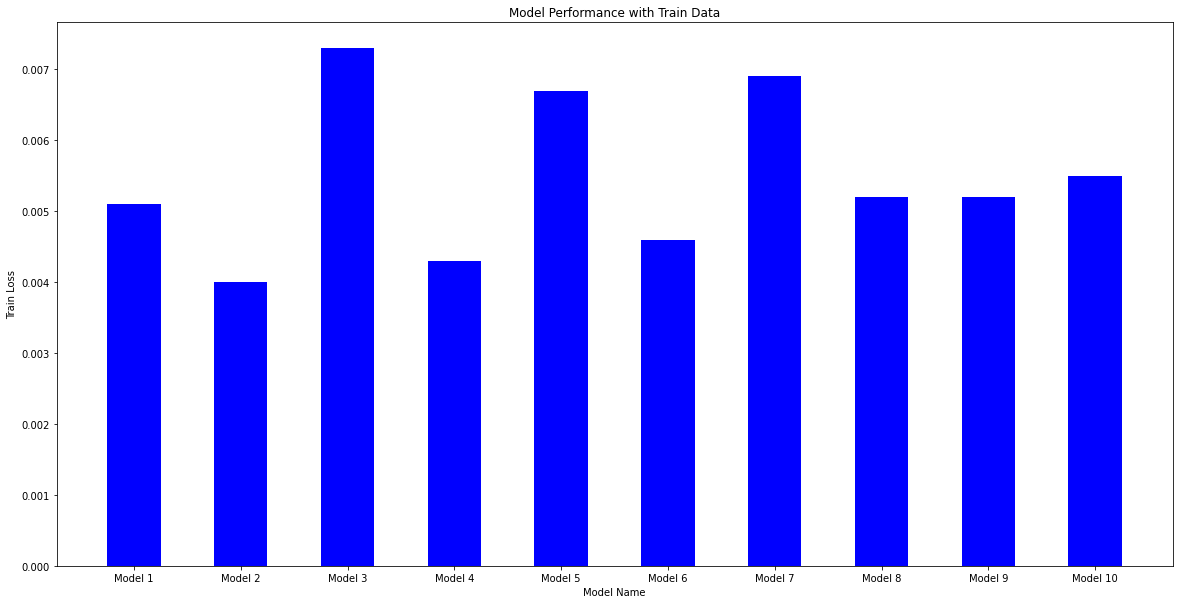

In [69]:
# Plotting the result

plt.figure(figsize = (20, 10))
plt.bar(data['Model_Name'], data['Train Loss'], color = 'blue', width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("Train Loss")
plt.title("Model Performance with Train Data")
plt.show();